In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'bitcoin_2017_to_2023.csv')

In [3]:
# Display the first 5 rows
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [4]:
df.tail()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851


In [7]:
 # Display basic info to understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 0 to 3125999
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


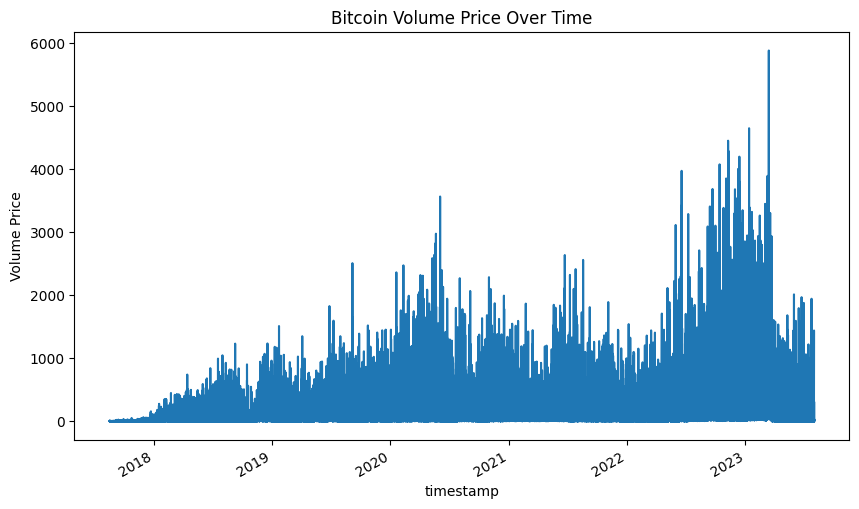

In [14]:
# Visualize the 'volume' prices over time (assuming there is an implicit date ordering)
df['volume'].plot(figsize=(10, 6))
plt.title('Bitcoin Volume Price Over Time')
plt.ylabel('Volume Price')
plt.show()


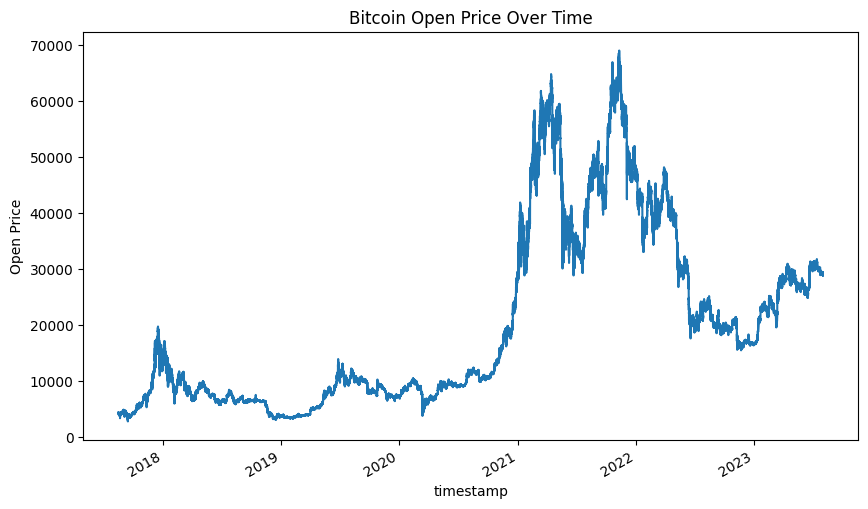

In [13]:
# Visualize the 'open' prices over time (assuming there is an implicit date ordering)
df['open'].plot(figsize=(10, 6))
plt.title('Bitcoin Open Price Over Time')
plt.ylabel('Open Price')
plt.show()


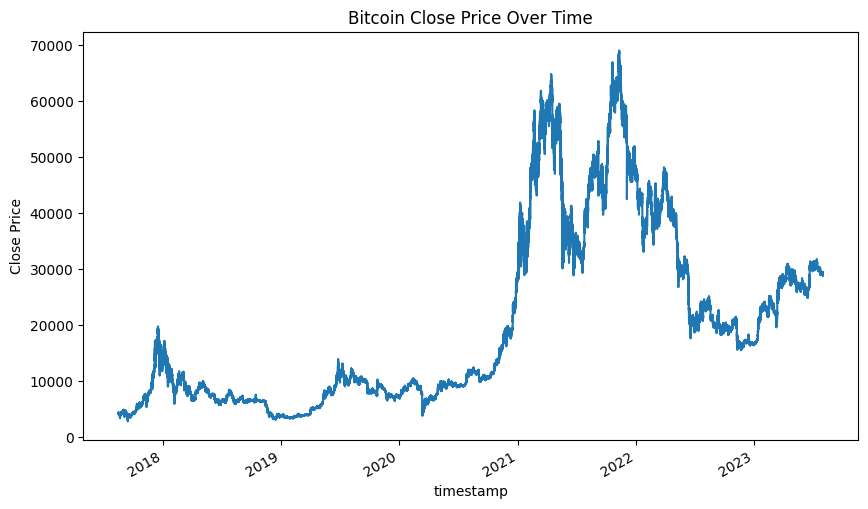

In [12]:
# Visualize the 'close' prices over time (assuming there is an implicit date ordering)
df['close'].plot(figsize=(10, 6))
plt.title('Bitcoin Close Price Over Time')
plt.ylabel('Close Price')
plt.show()


In [11]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
       'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume'],
      dtype='object')

### **RNN**

In [58]:
df = df.sample(frac=0.1, random_state=42) 

In [59]:
df.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
timestamp,,,,,,,,,
2023-05-19 00:15:00,26862.53,26872.67,26861.08,26872.67,11.171300,300087.152889,492,9.404250,252618.843938
2018-04-22 08:48:00,8931.21,8939.99,8931.21,8936.14,33.926004,303118.275277,202,19.131367,170927.003155
2020-10-04 07:56:00,10612.17,10612.18,10609.68,10610.00,14.927373,158390.260655,217,7.794448,82704.402870
2021-11-16 17:17:00,60750.27,60750.28,60696.18,60720.11,13.892540,843537.917323,612,5.493830,333547.003615
2023-04-28 18:16:00,29189.59,29198.30,29176.00,29198.30,22.549490,658165.384076,728,17.646500,515052.415534


In [61]:
df.shape

(62520, 9)

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, SimpleRNN, Input, Bidirectional, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from keras_tuner import RandomSearch


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from kerastuner import RandomSearch
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense

def build_rnn_model(hp, input_shape):
    model = Sequential()

    # Determine the number of RNN layers
    num_rnn_layers = hp.Int('num_rnn_layers', 1, 3)

    # Add RNN layers
    for i in range(num_rnn_layers):
        model.add(SimpleRNN(
            units=hp.Int(f'units_{i}', min_value=50, max_value=200, step=50),
            return_sequences=True if i < num_rnn_layers - 1 else False,
            input_shape=input_shape if i == 0 else None
        ))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    # Add Dense layer
    model.add(Dense(units=hp.Int('dense_units', min_value=10, max_value=50, step=10)))

    # Add output layer
    model.add(Dense(units=1))

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='mean_squared_error'
    )

    return model

def prepare_data_for_stock(stock_data, window_size=10):
    if not isinstance(stock_data, pd.Series):
        raise ValueError("stock_data must be a Pandas Series")

    # Create lagged features
    lagged_data = pd.DataFrame({'price': stock_data})
    for i in range(1, window_size + 1):
        lagged_data[f'lag_{i}'] = lagged_data['price'].shift(i)

    lagged_data.dropna(inplace=True)

    # Features and target
    X = lagged_data.drop(columns=['price']).values
    y = lagged_data['price'].values

    # Scaling the input data
    scaler_X = MinMaxScaler()
    X = scaler_X.fit_transform(X)

    # Scaling the target variable
    scaler_y = MinMaxScaler()
    y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Split into training and testing sets, using the last 6 months for testing
    test_size = 126  # Assuming 21 trading days per month, 6 months = 21 * 6
    X_train, X_test = X[:-test_size], X[-test_size:]
    y_train, y_test = y[:-test_size], y[-test_size:]

    return X_train, y_train, X_test, y_test, scaler_y

def process_stock_data_rnn(close_prices, epochs=20, batch_size=32):
    print(f"Processing close prices...")

    X_train, y_train, X_test, y_test, stock_scaler = prepare_data_for_stock(close_prices)

    # Define the input shape for the model
    input_shape = (X_train.shape[1], 1)

    # Reshape X for RNN input
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Define the tuner
    tuner = RandomSearch(
        lambda hp: build_rnn_model(hp, input_shape),
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='hyperparam_tuning_rnn',
        project_name='rnn_close'
    )

    # Run the hyperparameter search
    tuner.search(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=batch_size)

    # Get the best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    print(f"""
    The hyperparameter search is complete. The optimal number of RNN layers is {best_hps.get('num_rnn_layers')}.
    The optimal number of units in each RNN layer are {[best_hps.get(f'units_{i}') for i in range(best_hps.get('num_rnn_layers'))]}.
    The optimal dropout rates are {[best_hps.get(f'dropout_{i}') for i in range(best_hps.get('num_rnn_layers'))]}.
    The optimal dense units in the Dense layer is {best_hps.get('dense_units')}.
    The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
    """)

    best_model = tuner.hypermodel.build(best_hps)

    # Train the best model
    history = best_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=batch_size)

    y_pred = best_model.predict(X_test)

    y_pred_scaled = stock_scaler.inverse_transform(y_pred)
    y_test_scaled = stock_scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_test_scaled, y_pred_scaled)
    mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_scaled, y_pred_scaled)

    print(f"""
    Evaluation Metrics for close prices:
    Mean Squared Error (MSE): {mse}
    Mean Absolute Error (MAE): {mae}
    Root Mean Squared Error (RMSE): {rmse}
    R² Score: {r2}
    """)

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(y_test_scaled, color='blue', label='Actual')
    plt.plot(y_pred_scaled, color='red', label='Predicted')
    plt.title('Close Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Example usage
# Call the process function with your DataFrame
# process_stock_data_rnn(df['close'])


In [64]:
# Call the process function
process_stock_data_rnn(df['close'])

Processing close prices...
Reloading Tuner from hyperparam_tuning_rnn\rnn_close\tuner0.json

Search: Running Trial #10

Value             |Best Value So Far |Hyperparameter
3                 |1                 |num_rnn_layers
50                |150               |units_0
0.5               |0.1               |dropout_0
40                |10                |dense_units
0.00097278        |0.0037702         |learning_rate
50                |None              |units_1



Traceback (most recent call last):
  File "C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras_tuner\src\engine\tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
  File "C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras_tuner\src\engine\tuner.py", line 164, in _try_build
    model = self._build_hypermodel(hp)
  File "C:\Users\

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras_tuner\src\engine\tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
  File "C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras_tuner\src\engine\tuner.py", line 164, in _try_build
    model = self._build_hypermodel(hp)
  File "C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras_tuner\src\engine\tuner.py", line 155, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "C:\Users\0819\AppData\Local\Temp\ipykernel_13716\37437461.py", line 85, in <lambda>
    lambda hp: build_rnn_model(hp, input_shape),
  File "C:\Users\0819\AppData\Local\Temp\ipykernel_13716\37437461.py", line 18, in build_rnn_model
    model.add(SimpleRNN(
  File "C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\simple_rnn.py", line 398, in __init__
    super().__init__(
  File "C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\base_rnn.py", line 271, in __init__
    super().__init__(**kwargs)
  File "C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\trackable\base.py", line 204, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\base_layer.py", line 452, in __init__
    batch_input_shape = (batch_size,) + tuple(kwargs["input_shape"])
TypeError: 'NoneType' object is not iterable


In [16]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['close']])

# Prepare the data for RNN
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X, Y = create_dataset(scaled_data, time_step)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
# Build RNN model
rnn = Sequential()
rnn.add(SimpleRNN(50, return_sequences=True, input_shape=(time_step, 1)))
rnn.add(SimpleRNN(50))
rnn.add(Dense(1))
rnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
rnn.fit(X_train, Y_train, epochs=10, batch_size=32)
# Predict and plot
predicted_prices = rnn.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

Epoch 1/10
78149/78149 [==============================] - 1068s 14ms/step - loss: 4.1501e-05
Epoch 2/10
78149/78149 [==============================] - 1111s 14ms/step - loss: 5.2728e-05
Epoch 3/10
78149/78149 [==============================] - 1183s 15ms/step - loss: 7.1264e-06
Epoch 4/10
78149/78149 [==============================] - 1137s 15ms/step - loss: 3.5221e-05
Epoch 5/10
78149/78149 [==============================] - 1083s 14ms/step - loss: 4.9505e-06
Epoch 6/10
78149/78149 [==============================] - 992s 13ms/step - loss: 4.5722e-06
Epoch 7/10
78149/78149 [==============================] - 981s 13ms/step - loss: 1.9635e-06
Epoch 8/10
78149/78149 [==============================] - 986s 13ms/step - loss: 1.2836e-06
Epoch 9/10
78149/78149 [==============================] - 1045s 13ms/step - loss: 1.6621e-06
Epoch 10/10
19538/19538 [==============================] - 108s 6ms/step


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate metrics
mae = mean_absolute_error(Y_test, predicted_prices)
mse = mean_squared_error(Y_test, predicted_prices)
r2 = r2_score(Y_test, predicted_prices)

# Print metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 20067.188598893837
Mean Squared Error (MSE): 660754653.1875951
R² Score: -11225028484.76653


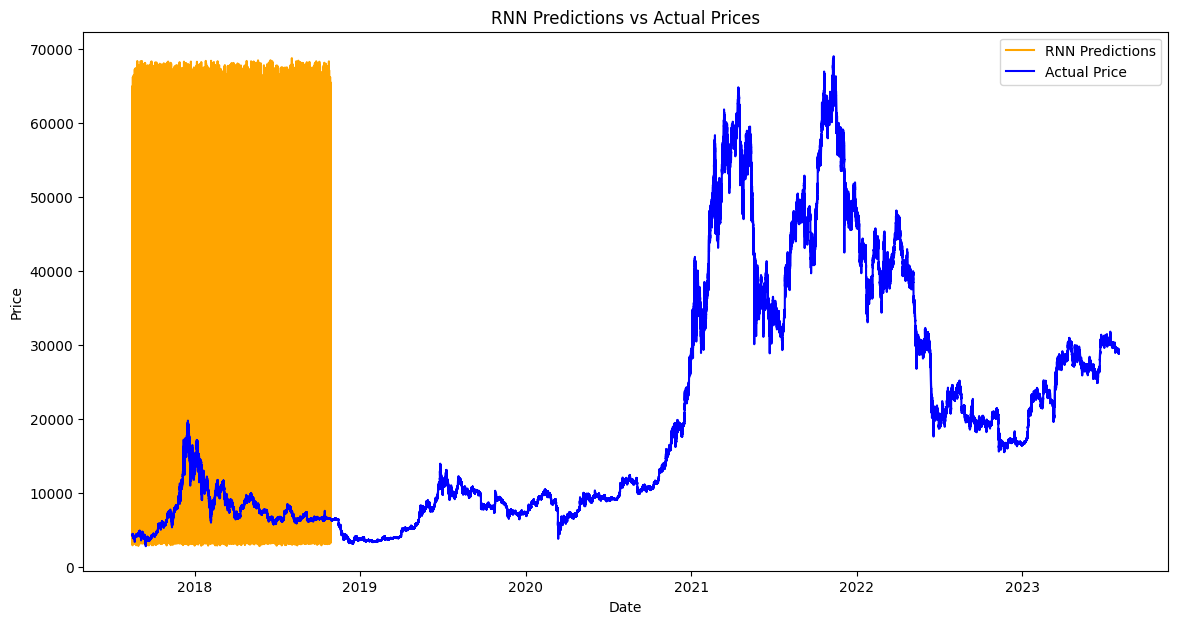

In [44]:
# Prepare the index for plotting
# Adjust the starting index for predicted prices based on the test set
predicted_index = df.index[len(df) - len(Y_test):]  # Match the index with the number of predictions

# Ensure correct length for plotting
predicted_prices = predicted_prices.flatten()  # Flatten to 1D

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(predicted_index, predicted_prices, label='RNN Predictions', color='orange')
plt.plot(df.index, df['close'], label='Actual Price', color='blue')
plt.title('RNN Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

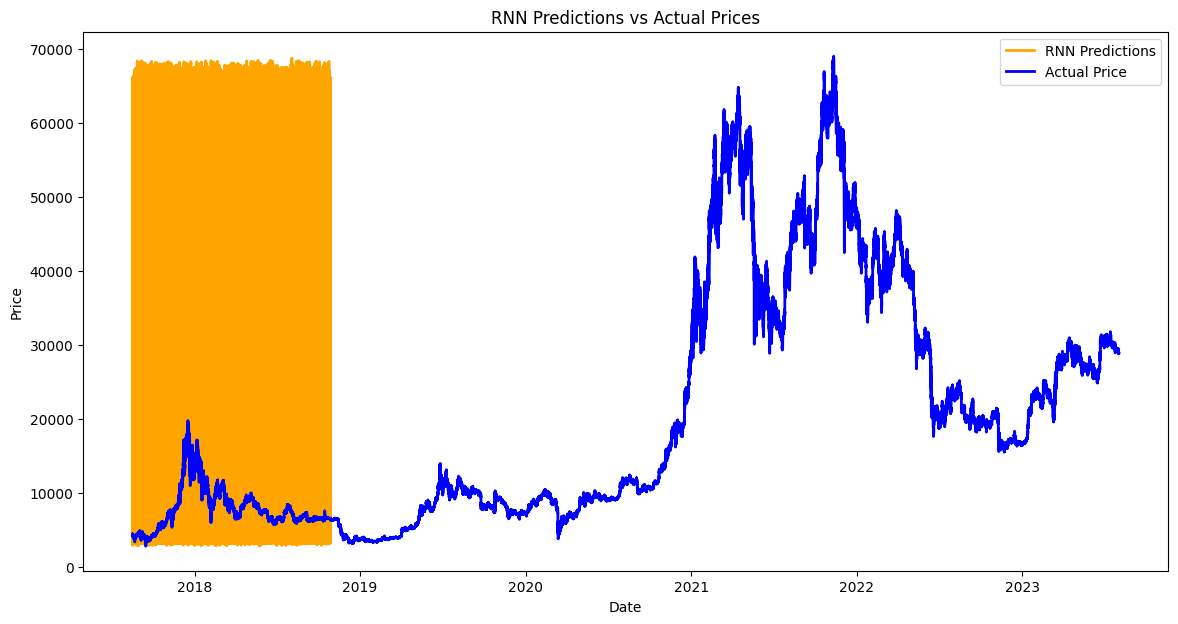

In [30]:
# Prepare the index for plotting
# Use the last index of the training set plus the test set length
# Adjusted to match the indices of the actual prices
predicted_index = df.index[len(df) - len(Y_test):]

# Ensure correct length for plotting
# predicted_prices = predicted_prices.flatten()  # Flatten to 1D

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(predicted_index, predicted_prices, label='RNN Predictions', color='orange', linewidth=2)
plt.plot(df.index, df['close'], label='Actual Price', color='blue', linewidth=2)
plt.title('RNN Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
import pickle

with open('RNN_Model.pkl', 'wb') as fp:
    pickle.dump(rnn, fp)

### **LSTM**

In [ ]:
from keras.layers import LSTM

# Build LSTM model
lstm = Sequential()
lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
lstm.add(LSTM(50))
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm.fit(X, Y, epochs=10, batch_size=32)

# Predict and plot
predicted_prices = lstm.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)

plt.plot(df.index[time_step+1:], predicted_prices, label='LSTM Predictions')
plt.plot(df.index, df['Price'], label='Actual Price')
plt.legend()
plt.show()


### **ARIMA**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (p, d, q values can be tuned)
arima = ARIMA(df['Price'], order=(5, 1, 0))
arima_model = arima.fit()

# Forecast for the future
forecasted = arima_model.forecast(steps=30)
plt.plot(df.index, df['Price'], label='Actual Price')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecasted, label='ARIMA Forecast')
plt.legend()
plt.show()


### **FBProphet**

In [ ]:
from fbprophet import Prophet

# Prepare data for Prophet
prophet_df = df.reset_index()[['Date', 'Price']]
prophet_df.columns = ['ds', 'y']

# Fit Prophet model
fbpro = Prophet()
fbpro.fit(prophet_df)

# Make future predictions
future = fbpro.make_future_dataframe(periods=30)
forecast = fbpro.predict(future)

# Plot the results
fbpro.plot(forecast)
plt.show()
